Name: Andrea Gomez

# Part A: Model Code (65 pts)

1. Write a function to calculate and return the Euclidean distance of two vectors.[2 pts]

In [1]:
import numpy as np
import pandas as pd
from operator import itemgetter
import math
import matplotlib.pyplot as plt

In [2]:
def euclidean_distance(vector1, vector2):
    
    # if the parameters are not numpay arrays
    if isinstance([vector1, vector2] ,(pd.core.series.Series,pd.DataFrame)):  
        vector1 = vector1.to_numpy()
        vector2 = vector2.to_numpy() 
        
    dist = 0
    # if one of the vector is 2D
    if (len(vector1.shape) > 1) or (len(vector2.shape) > 1):
        dist = np.sum((vector1 - vector2)**2, axis=1)
        return np.sqrt(dist)
    else:
        dist = np.sum((vector1 - vector2)**2)
        return math.sqrt(dist)
                          

2. Write a function to calculate and return the Manhattan distance of two vectors.[2 pts]

In [3]:
def manhattan_distance(vector1, vector2):
    
    # if one of the vector is 2D
    if (len(vector1.shape) > 1) or (len(vector2.shape) > 1):
        return np.sum(np.abs(vector2 - vector1), axis=1)
    else:
        return np.sum(np.abs(vector2 - vector1))

3. Write a function to calculate and return the accuracy and generalization error of two vectors.
[4 pts]

In [4]:
# accuracy_gen calculates and returns the accuracy and
# generalization given 2 vectors, accuracy = (TP+TN)/(total elements)
# parameters:
#     target, prediction: 1D numpy arrays of the same length
# returns:
#     float - accuracy, float - generalization error

def accuracy_gen(target, prediction):
    acc = sum((target == prediction))/(len(target))
    return acc, (1 - acc)   

4. Write three functions to compute: precision, recall and F1 score. [6 pts]

In [5]:
# precision_sc calculates and returns the precision score 
# between two vectors (target and prediction)
# parameters:
#     target, prediction: 1D numpy arrays of the same length
# returns: 
#     float, the precision score

def precision_sc(target, prediction, zero_division=1):
    
    TP = np.sum(np.logical_and(target == 1, prediction == 1))
    FP = np.sum(np.logical_and(target == 0, prediction == 1))
    
    return zero_division if (TP + FP) == 0 else (TP / (TP + FP))

# recall_sc calculates and returns the recall score 
# between two vectors (target and prediction)
# parameters:
#     target, prediction: 1D numpy arrays of the same length
# returns: 
#     float, the recall score

def recall_sc(target, prediction, zero_division=1):
    
    TP = np.sum(np.logical_and(target == 1, prediction == 1))
    FN = np.sum(np.logical_and(target == 1, prediction == 0))

    return zero_division if (TP + FN) == 0 else (TP / (TP + FN))

# f1_sc calculates and returns the F1 score 
# between two vectors (target and prediction)
# parameters:
#      target, prediction: 1D numpy arrays of the same length
# returns: 
#      float, the F1 score

def f1_sc(target, prediction):
    
    p = precision_sc(target, prediction)
    r = recall_sc(target, prediction)
    
    return ((p * r)/(p + r)) * 2

5. Write a function to compute the confusion matrix of two vectors. [4 pts]

In [6]:
# computes and returns the confusion matrix
# of two vectors (target and prediction)
# parameters:
#      target, prediction: 1D numpy arrays of the same length
# returns: 
#      a numpy matrix (n x n) n = number of classes in target

def myconfusion_matrix(target, prediction):
    
    #obtain the classes from the target vector
    classes = sorted(set(target))
    # create a dictionary to add the values of each class 
    indices = {key: i for i, key in enumerate(classes)}
    # create a matrix of zeros 
    conf_matrix = np.zeros((len(classes),len(classes)))
    for i in range(len(target)):
        r = indices[target[i]]
        c = indices[prediction[i]]
        conf_matrix[r][c] += 1
    
    return conf_matrix


6. Write a function to generate the Receiver Operating Characteristic (ROC) curve. [8 pts]


In [7]:
# myroc_curve computes the FPR and FPR for different
# values of a threshold. In this case from 0 -1 by 0.1 steps
# parameters:
#      target, prediction: 1D numpy arrays of the same length
# returns:
#      3 numpy arrays for FPR, TPR and the threshold values

def myroc_curve(target, prediction_scores):

    tpr = []
    fpr = []
    # compute predictions for each threshold 
    for threshold in np.arange(0, 1.1, 0.1): 
        # compute predcitions for an specific threshold value 
        thre_pred = np.array(prediction_scores > threshold ).astype(int)
        # compute TN and FP 
        TN = np.sum(np.logical_and(target == 0, thre_pred == 0))
        FP = np.sum(np.logical_and(target == 0, thre_pred == 1))
        # store the values in a list 
        tpr.append(recall_sc(target, thre_pred))
        fpr.append(FP/ (FP + TN))
    
    return np.array(fpr), np.array(tpr), np.arange(0, 1.1, 0.1)

7. Write a function to compute area under curve (AUC) for the ROC curve. [4 pts]`

In [8]:
# myauc_roc computes area under the ROC curve
# parameters:
#      target: 1D numpy array, expected values (labels)
#      prediction_scores: 1D numpy array containing the probabilities
#      of the positive class of the nearest neigbors 
# returns:
#      float, area under the ROC curve

def myauc_roc(target, prediction_scores):
    
    fpr, tpr, threshold = myroc_curve(target, prediction_scores)
    tauc =0
    auc = 0    
    for i, x1 in enumerate(fpr[1:]):
        x0 = fpr[i]
        y0 = tpr[i]
        y1 = tpr[i+1]
        # compute rectangle areas
        auc += abs((x1 - x0)) * y1
        # compute triangle areas
        tauc += ((x1-x0)*(y1-y0))/2 
    
    return auc + tauc

8. Write a function to generate the precision-recall curve. [10 pts]

In [9]:
# myprecision_recall_curve computes the precision and recall for 
# different values of a threshold. In this case from 0 -1 by 0.1 steps
# parameters:
#      target: 1D numpy array, expected values (labels)
#      prediction_scores: 1D numpy array containing the probabilities
#      of the positive class of the nearest neigbors 
# returns:
#      3 numpy arrays for precisions, recalls and the threshold values

def myprecision_recall_curve(target, prediction_scores):

    precisions = []
    recalls = []
    for threshold in np.arange(0, 1.1, 0.1): 
        # compute predcitions for an specific threshold value 
        thre_pred = np.array(prediction_scores > threshold ).astype(int)
        # compute prediction and recall, store it on a list
        precisions.append(precision_sc(target, thre_pred))
        recalls.append(recall_sc(target, thre_pred))
        
    return np.array(precisions), np.array(recalls), np.arange(0, 1.1, 0.1)

In [10]:
# Code to plot the following graphs from Hands on Machine Learning with scikit,
# Keran and TensorFlow by Aureli3n Geron book(Chapter 3) 

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal
    plt.axis([0, 1, 0, 1])
    plt.title("ROC Curve",  fontsize=15)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)

def plot_precision_vs_recall(precisions, recalls, thresholds):   
    plt.plot(recalls, precisions, "b-")
    plt.xlabel('Recall', fontsize=14)
    plt.ylabel('Precision', fontsize=14)
    plt.title("Precision vs. Recall", fontsize=15)
    plt.grid(True)
    plt.axis([0, 1, 0, 1])
    plt.show();   

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.figure(figsize=(8,4))
    plt.plot(thresholds, precisions, "b--", label='Precision')
    plt.plot(thresholds, recalls, "g-", label='Recall')
    plt.legend(loc='center right', fontsize=16)
    plt.xlabel('Threshold', fontsize=16)
    plt.title("Precision and Recall vs. Threshold", fontsize=15)
    plt.grid(True)
    plt.axis([0, 1, 0, 1])   
    plt.show();

9. Implement a KNN_Classifier model class. It should have the following three methods. [20
pts]

In [11]:
class KNN_Classifier:

    from operator import itemgetter
    
    # constructor of the clas KNN_Classifier, 
    def __init__(self):
        pass
    
    """
    fit(self, X, y , n_neighbors, weights='uniform', **kwargs)
        Trains the model with the specified parameters and data sets.
    
        Parameters
        ----------
        X: ndarray
           A numpy array representing the data (rows: data sample, col: features)
        Y: ndarray
           A 1D numpy array with labels corresponding to each row of the feature
           matrix X
        n_neighbors: int
           The number of nearest neighbors.
        weight: str, optional, default= 'uniform'
           The weight function used in the prediction.
            - uniform: uniform weights. All points in each neighborhood are 
                  weighted equally.
            - distance: weight points by the inverse of their distance. In this 
                  case, closer neighbors of a query point will have a greater 
                  influence than neighbors which are further away.
        metric: distance metric to be used to calculate distance between two vectors.
            - euclidean: Euclidean distance.
            - manhattan: Manhattan distance.
    """
    
    def fit(self, X, y , n_neighbors=None, weights='uniform', 
            metric='euclidean', kwargs=None):
        
        self.X = X
        self.y = y
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.metric = metric
        self.kwargs = kwargs
        
        # update the attributes with the kwargs if used 
        if self.kwargs != None:
            self.__dict__.update(**kwargs)
    
    """
    predict(self, X): 
        compute the predictions for the X data set.
    
        Parameters
        ----------
        X : ndarray
            A numpy array containing samples to be used for prediction. Its 
            rows represent data samples and columns represent features.
    
        Returns
        ----------
        ndarray
        1D array of predictions for each row in X. The 1D array should be 
        designed as a column vector.
    """    
    
    def predict(self, X):
        
        # the data used to find the new predictions
        self.data = X
        # list to store the predictions of our data
        predictions = []
        
        # convert any pandas objects into numpy arrays
        if isinstance(self.data,(pd.core.series.Series,pd.DataFrame)):  
            self.data = self.data.to_numpy()
        
        # evaluates every row in the X data set and predict its class 
        for index, row_to_pred in enumerate(self.data):
            distances = 0
            # compute the difference between this row and the trained data
            if self.metric == 'euclidean':
                distances = euclidean_distance(self.X, row_to_pred)
                #distances = np.sqrt(np.sum((self.data - row_to_pred)**2, axis=1))
            elif self.metric == 'manhattan':
                distances = manhattan_distance(self.X, row_to_pred)
             
            # to avoid dividing by zero in the case that the 2 vectors are the same 
            distances[distances == 0] = 0.00000001   
            # stack the labels array as a column to the distances array
            neighbors = np.column_stack((distances, self.y))
            # sort the numpy array neighbors based on the column 0 (distance)
            neighbors = neighbors[neighbors[:, 0].argsort()]
            # slice the matrix to grab only the n_nearest rows(neighbors)
            neighbors = neighbors[:self.n_neighbors, :]
    
            zeros = 0
            ones = 0
            
            if self.weights == 'uniform':
                # count the labels for 1 and 0 
                ones = np.count_nonzero(neighbors[:,1] == 1)
                zeros = self.n_neighbors - ones
               
            elif self.weights == 'distance':
               
                # find the inverse of the distance
                neighbors[:,0] = 1 / neighbors[:,0]
                # add the inverse values 
                sum_w = np.sum(neighbors[:,0])
                # divide each inverse by the sum of all of them
                neighbors[:,0] = neighbors[:,0] / sum_w

                # add the weights of the labels
                ones = neighbors[np.isin(neighbors[:,1], 1)]
                ones = np.sum(ones[:,0])

                zeros = neighbors[np.isin(neighbors[:,1], 0)]
                zeros = np.sum(zeros[:,0])
            else:
                print('{} value is not accepted. The parameter weights can be \'uniform\' or \'distance\''.format(self.weights))
                return 0
            
            # append prediction to an array depending on the class that has the most
            # weight or the most number of elements of the same class in the nearest neighbors
            predictions.append(1 if ones > zeros else 0)
                
        return np.array(predictions)
    
    """
        predict_proba(self, X)
            Return probability estimates for the test data X.
        
            Parameters
            -----------
            X: array-like 
               A numpy array containing test samples to be used for prediction. Its rows 
               represent data samples and columns represent features.

            Returns
            -----------
            ndarray or a list of n_outputs
            The class probabilities of the input samples. Classes are ordered 
            by lexicographic order.
    """
    
    def predict_proba(self, X):
        # the data to find the predictions
        self.data = X
    
        # list to store the predictions of our data
        probabilities = []
        
        # convert any pandas objects into numpy arrays
        if isinstance(self.data,(pd.core.series.Series,pd.DataFrame)):  
            self.data = self.data.to_numpy()
          
        for index, row_to_pred in enumerate(self.data):
            distances = []
            
            # computes the difference between this row and all the data
            if self.metric == 'euclidean':
                distances = euclidean_distance(self.X , row_to_pred)
            elif self.metric == 'manhattan':
                distances = manhattan_distance(self.X, row_to_pred)
            # stack the labels array as a column to the distances array
            neighbors = np.column_stack((distances, self.y))
            # sort the numpy array based on the column 0 (distance)
            neighbors = neighbors[neighbors[:, 0].argsort()]
            # slice the matrix to grab only the n_nearest rows(neighbors)
            neighbors = neighbors[:self.n_neighbors,:]
            
            ones = np.sum(neighbors[:,1])
            zeros = self.n_neighbors - ones
            
            probabilities.append([zeros/self.n_neighbors , ones/self.n_neighbors])
        
        return np.array(probabilities)
        

# Part B: Data Processing (25 pts)

10. Read in the winequality-white.csv file as a Pandas data frame.



In [12]:
import pandas as pd

#load the date into a Panda Frame
wine = pd.read_csv('winequality-white.csv', sep=';')
wine.shape

(4898, 12)

11. The target will be the “quality” column which represents rating of wine and ranges from 3 to 8. You will need to convert it into a two-category variable consisting of “good” (quality > 5) & “bad” (quality <= 5). Your target vector should have 0s (representing “bad” quality wine) and 1s (representing “good” quality wine).

In [13]:
wine['quality'] = (wine['quality'] > 5).astype(int)
wine['quality'].value_counts()

1    3258
0    1640
Name: quality, dtype: int64

12. Use the techniques from the first recitation to summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles. Include this in your report. [3 pts]

In [14]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


In [15]:
wine.corr()['quality'].abs().sort_values(ascending=False)

quality                 1.000000
alcohol                 0.383280
density                 0.268696
volatile acidity        0.225440
chlorides               0.183939
total sulfur dioxide    0.170924
residual sugar          0.092756
fixed acidity           0.089749
pH                      0.083687
sulphates               0.051858
free sulfur dioxide     0.001278
citric acid             0.000700
Name: quality, dtype: float64

13. Shuffle the rows of your data. You can use def = df.sample(frac=1) as an idiomatic way to shuffle the data in Pandas without losing column names. [2 pts]

In [16]:
# Drop the duplicate rows
wine = wine.drop_duplicates()

# shuffle the rows 
wine = wine.sample(frac=1, random_state=42)
wine.shape

(3961, 12)

14. Generate pair plots using the seaborn package. This will be used to identify and report the redundant features, if there is any. [2 pts]

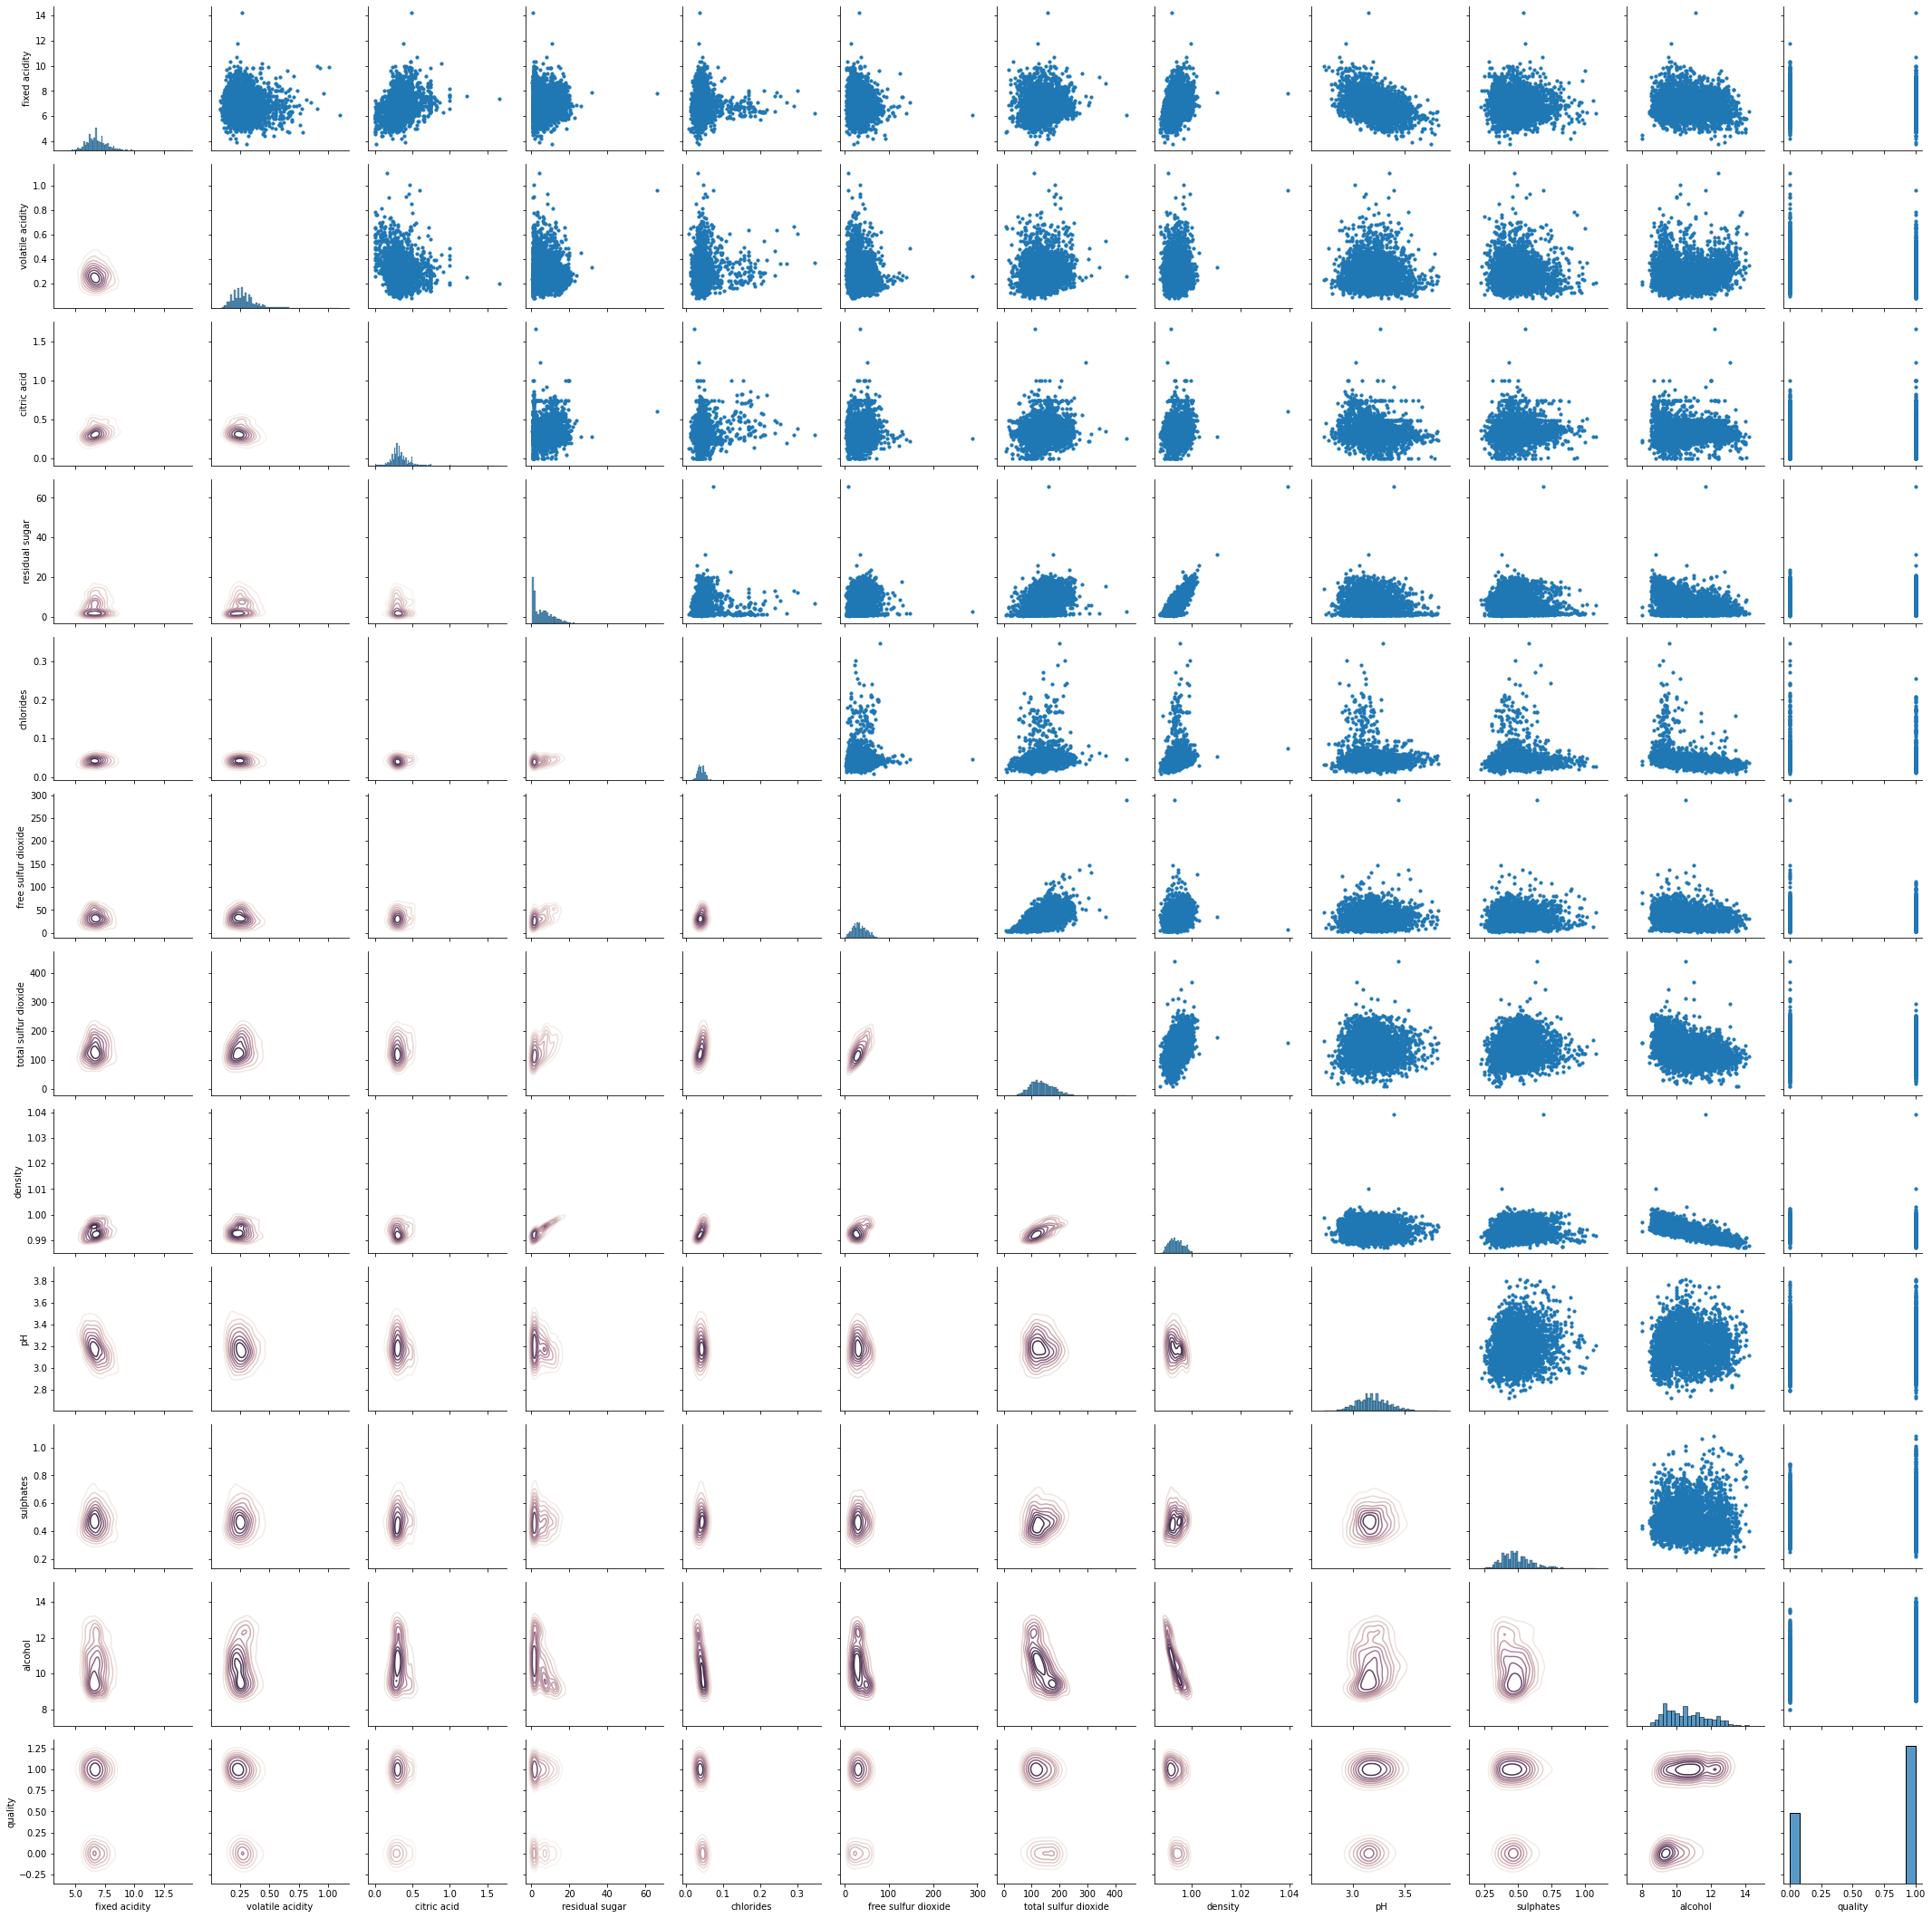

In [17]:
# Code to plot the pairplot from Workbook1 by Prof. Anita Raja

import warnings 
warnings.filterwarnings('ignore')

#Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns 
from IPython.display import Image

cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

#Pair grid set up
g = sns.PairGrid(wine)

#Scatter plpot on the upper triangle
g.map_upper(plt.scatter, s=10)

# Distribution on the diagonal
g.map_diag(sns.histplot, kde=False)

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap=cmap)

g.savefig("pairplot.png")



15. Drop the redundant features. [1 pts]


In [17]:
to_drop = ['free sulfur dioxide', 'citric acid']
wine = wine.drop((to_drop), axis=1)

16. Write a function named “partition” to split your data into training and test set. The function should take 3 arguments:

        • feature matrix (numpy array with rows representing data samples and columns representing features.),
        • target vector (numpy array with labels corresponding to each row of the feature matrix),
        • t where t is a real number to determine the size of partition. For example, if t is set to 0.2, then 80% of the data will be used for training and 20% for testing.

    This function should return two feature matrices for training and test data, and two target vectors for training and test data. [6 pts]

In [18]:
# build a unique identifier.
# Should I build a unique identifier as they did in ch2 so we don't 
# have to worry about deleting rows or appending new data only to the end
# of the dataframe.

# Do I drop the target feature in the function or the feature data shouldnn't
# have the target feature?

"""Splits the data into training and test set.

    Parameters
    ----------
    X : numpy array
        Feature matrix (data) with rows representing data samples and columns
        representing features
    y : numpy array
        Target vector containing labels corresponding to each row of
        the feature matrix
    test_ratio: float number 
        A real number to determine the size of partition. Ranges
        from 0 to 1, excluding both ends.
    
    Returns
    -------
        pandas dataframes
        two feature matrices for training and test data, 
        and two target vectors for training and test data.
        data_train, data_test, label_train, label_test 
    """

def partition(X, y, test_ratio):
    # create an array with the indices of rows for the test set
    in_test = X.head(int(len(X)*test_ratio))
    return X[~(X.index).isin(in_test.index)] , X.loc[in_test.index], y[~(y.index).isin(in_test.index)] , y.loc[in_test.index]
    
# stratified partition keeps the proportion of the different classes
# in the data in the split training and test set
def strat_partition(X, y, test_ratio):
    
    # number of rows in test set
    rows_in_test = int(len(X)*test_ratio) 
    #create a list of tuples to access the values of the categories
    categories = [(i,v) for i,v in y.value_counts().items()]
    #calculate proportions of each category per train and test sets
    proportion1 = categories[0][1] / len(y)
    
    # number of True rows stratified test set
    rows_cat1 = int(rows_in_test * proportion1)
    rows_cat2 = int(rows_in_test - rows_cat1)
    
    # Filters to retrieve categories
    cat1 = y[y == categories[0][0]]
    cat2 = y[y == categories[1][0]] 
    
    # stratified split label test
    label_test = pd.concat([cat1.head(rows_cat1), cat2.head(rows_cat2)]) 
    # stratified split label train                      
    label_train = y[~(y.index).isin(label_test.index)]
    #print(label_test.index)
    
    data_test = X.loc[label_test.index] 
    data_train = X.loc[label_train.index]  

    return data_train , data_test, label_train, label_test

Create a matrix containing the features of the data set and a vector containing the label(target) of the data set

In [19]:
# label vector
y = wine['quality']
# feature dataset
wine = wine.drop('quality', axis=1 )

In [20]:
# split the data into train and test set
X_train, X_test, y_train, y_test = strat_partition(wine, y, 0.2)

17. Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and using Euclidean distance. [6 pts]

        a. Use accuracy and F1 score to compare your predictions to the expected labels.

In [21]:
# convert pandas objects into numpy arrays 
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy()

# create an instance of KNN_Classifier()
knn = KNN_Classifier()
# train the model with the train set
knn.fit(X_train_np, y_train_np , n_neighbors=5, weights='uniform')
# get the predictions 
x_predictions = knn.predict(X_train_np)

print('Accuracy:', accuracy_gen(y_train_np, x_predictions)[0])
print('F1 score:', f1_sc(y_train_np, x_predictions))

Accuracy: 0.7841590407068476
F1 score: 0.8434065934065934


    b. Now standardize each feature of your training set (subtract mean and divide by standard deviation). Use the mean and standard deviation values for each feature in the training set to scale the test data.
    
    c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1 score with the expected labels.


In [22]:
X_train_std = X_train.copy()

# Standardized the data
for col in X_train.columns.values:
    mean = X_train[col].mean()
    std = X_train[col].std()
    X_train_std[col] = (X_train_std[col] - mean) / std
    
# convert standardized pandas dataframe to numpy arrays
X_train_np_std = X_train_std.to_numpy()

# train the model and predict the values 
knn = KNN_Classifier()
knn.fit(X_train_np_std, y_train_np , n_neighbors=5, weights='uniform')
x_predictions_std = knn.predict(X_train_np_std)
x_predictions_std

print('Accuracy - satandardized data:', accuracy_gen(y_train_np, x_predictions_std)[0])
print('F1 score - satandardized data:', f1_sc(y_train_np,x_predictions_std))

Accuracy - satandardized data: 0.8239192174187441
F1 score - satandardized data: 0.8701721731037692


    d. Compare the two accuracy values and the F1 scores; and decide whether you should use standardized data or unscaled data for the remainder of the assignment. This will described in the report

In [23]:
print('Accuracy non-standardized data:', accuracy_gen(y_train_np, x_predictions)[0])
print('F1 score non-standardized data:', f1_sc(y_train_np, x_predictions))

print('\nAccuracy -satandardized data):', accuracy_gen(y_train_np, x_predictions_std)[0])
print('F1 score -satandardized data):', f1_sc(y_train_np,x_predictions_std))

Accuracy non-standardized data: 0.7841590407068476
F1 score non-standardized data: 0.8434065934065934

Accuracy -satandardized data): 0.8239192174187441
F1 score -satandardized data): 0.8701721731037692


    e. Perform a similar test for inverse distance weighting in the KNN_Classifier model and determine whether or not to use it. This will go in the report. [5 pts]

In [24]:
# X_train_np = X_train.to_numpy()
# y_train_np = y_train.to_numpy()
# X_train_np_std = X_train_std.to_numpy()

print("Test for inverse distance weighting\n")
knnd = KNN_Classifier()
knnd.fit(X_train_np, y_train_np , n_neighbors=5, weights='distance')
x_predictionsd = knnd.predict(X_train_np)

print('Accuracy (distance weighting):', accuracy_gen(y_train_np, x_predictionsd)[0])
print('F1 score (distance weighting):', f1_sc(y_train_np,x_predictionsd))

# Training model with standardized data
knnd = KNN_Classifier()
knnd.fit(X_train_np_std, y_train_np , n_neighbors=5, weights='distance')
x_predictionsd = knnd.predict(X_train_np_std)

print()
print('Accuracy (distance weighting-standardized):', accuracy_gen(y_train_np, x_predictionsd)[0])
print('F1 score (distance weighting-standardized):', f1_sc(y_train_np,x_predictionsd))

Test for inverse distance weighting

Accuracy (distance weighting): 1.0
F1 score (distance weighting): 1.0

Accuracy (distance weighting-standardized): 1.0
F1 score (distance weighting-standardized): 1.0


NOTE: In this evaluation the values are perfect, considering that we are evaluating the training set, the same dataset we fit(trained) the model with. This happens because at some point the distance of the vectors compared is zero, making this the nearest neighbor with the most weight over the other neighbors.

## Part C: Model Evaluation (50 pts)

18) Evaluation of an estimator performance via cross-validation: Implement the S-fold crossvalidation function. [10 pts]
    

In [25]:
"""
    Evualtes the model using a cross-validation.

    Parameters
    ----------
        folds: int
            Number of folds.
        data: numpy array 
            Array with rows representing data samples and columns representing 
            features.
        labels:  numpy array with labels corresponding to each row of 
            training features.
        model: object
            Object with the fit and predict methods
        model_args: dictionary 
            dictionary of arguments to pass to the 
            classification algorithm. 
        error_function : default = accuracy
            Computes the performance measure of the model. It
            can be f1, precision, recall, accuracy, mse or rmse.
            
    Returns
    ----------    
        A dictionary containing:
         - expected_labels
         - predicted_labels
         - average_error
    """

def sFold(folds, data, labels, model, error_function = 'accuracy', **model_args):
    
    indices = s_partition(folds, data)
    predicted_labels = []
    errors = []
    expected_labels = []
    
    start = 0
    for i in indices:
        # test set
        test_set = data[start:i]
        # train set (data not in test set)
        train_set = np.concatenate((data[:start], data[i:]))
        # labels of the test set
        test_labels = labels[start:i]
        # labels of the train set
        train_labels = np.concatenate((labels[:start], labels[i:]))
        start = i
            
        my_model = model()
        # fit the data to all the other partitions (1 - fold1)
        my_model.fit(train_set, train_labels , kwargs = model_args)
        # make a prediction on current partition
        prediction_fold = my_model.predict(test_set)
        # append the predictions of this round to predictions[]
        predicted_labels = np.append(predicted_labels, prediction_fold)
        
        # selects an error function
        if error_function == 'accuracy':
            error = sum((test_labels == prediction_fold))/(len(test_labels))
        elif error_function == 'f1':
            error = f1_sc(test_labels, prediction_fold)
        elif error_function == 'precision':
            error = precision_sc(test_labels, prediction_fold)
        elif error_function == 'recall':
            error = recall_sc(test_labels, prediction_fold)
        elif error_function == 'mse':
            error = np.mean((test_labels - prediction_fold)**2)
        elif error_function == 'rmse':
            error = np.sqrt(np.mean((test_labels - prediction_fold)**2))  
        
        # stores the error and expected labels of this round
        errors = np.append(errors, error)
        expected_labels = np.append(expected_labels, test_labels)
    
    return {'expected_labels':expected_labels, 
            'predicted_labels':predicted_labels,
            'average_error':np.mean(errors)}

# Computes the size of each fold and the indices from the start to the 
# end of each fold. Folds are equally divided 
# returns: an array with indices 
def s_partition(s, data):
    
    len_fold = len(data) // s
    indices_folds = []
    
    res = 0
    if len(data) % s != 0:
        res = len(data) % s

    left = s - res
    
    for i in range(res):
        indices_folds.append((len_fold + 1)*(i+1))
        res -= 1
        
    for i in range(left):
        indices_folds.append(((len_fold + 1)*(len(data) % s)) + len_fold*(i+1))
        
    # because slicing doesn't include the last element
    # I add an extra one to the last partition
    indices_folds[-1] += 1 
    
    return indices_folds

19) Use your sfold function to evaluate the performance of your model over each combination of k and distance metrics from the following sets: [5 pts]

    i.   k=[1,5,9,11]  distance = [Euclidean, Manhattan]
    ii.  weights = [uniform, distance] [5 pts]
    iii. Store the returned dictionary for each. We will need these for the report.
    iv.  Determine the best model based on the overall performance (lowest
        average error). For the error_function of the S-fold function argument use the F1 score function.

In [ ]:
y_test_np = y_test.to_numpy()

k_values = [1, 5, 9, 11]
uniform_test = {} 
#keys = [1eF1, 1eAc, 1mF1, 1mAc, 5eF1, 5eAc, 5mF1, 5mAc, 
#        9eF1, 9eAc, 9mF1, 9mAc, 11eF1, 11eAc, 11mF1, 11mAc]

# WEIGHT: UNIFORM for all these test

for k in k_values:

    # metric: Euclidean
    # error function: F1 score
    model_args = {'n_neighbors': k, 'weights':'uniform'}
    # run the cross-validation test 
    eucl_unif = sFold(4, X_train_np, y_train_np, model = KNN_Classifier, 
                      error_function = 'f1', **model_args)
    uniform_test[str(k)+'eF1'] = eucl_unif
    
    # metric: Euclidean
    # error function: Accuracy
    model_args = {'n_neighbors': k, 'weights':'uniform'}
    # run the cross-validation test 
    eucl_unif = sFold(4, X_train_np, y_train_np, model = KNN_Classifier, **model_args)
    uniform_test[str(k)+'eAc'] = eucl_unif
    
    # metric: Manhattan
    # error function: F1 score
    model_args = {'n_neighbors': k, 'weights':'uniform', 'metric':'manhattan'}
    # run the cross-validation test 
    manh_unif = sFold(4, X_train_np, y_train_np, model = KNN_Classifier, 
                      error_function = 'f1', **model_args)
    uniform_test[str(k)+'mF1'] = manh_unif
    
    # metric: Manhattan
    # error function: Accuracy
    model_args = {'n_neighbors': k, 'weights':'uniform', 'metric':'manhattan'}
    # run the cross-validation test 
    manh_unif = sFold(4, X_train_np, y_train_np, model = KNN_Classifier, **model_args)
    uniform_test[str(k)+'mAc'] = manh_unif
    

In [ ]:
print("Weight: uniform\n")
for key in uniform_test:
    print( 'Average error of', key, ':', uniform_test[key]['average_error'])

In [ ]:
k_values = [1, 5, 9, 11]
distance_test = {} 
#keys = [1eF1, 1eAc, 1mF1, 1mAc, 5eF1, 5eAc, 5mF1, 5mAc, 
#        9eF1, 9eAc, 9mF1, 9mAc, 11eF1, 11eAc, 11mF1, 11mAc]

# WEIGHTS: DISTANCE for all these test 

for k in k_values:
    # metric: Euclidean 
    # error function: F1
    model_args = {'n_neighbors': k, 'weights':'distance'}
    eucl_dist = sFold(4, X_train_np, y_train_np, error_function = 'f1', 
                      model = KNN_Classifier, **model_args)
    distance_test[str(k)+'eF1'] = eucl_dist
    
    # metric: Euclidean 
    # error function: Accuracy
    model_args = {'n_neighbors': k, 'weights':'distance'}
    eucl_dist = sFold(4, X_train_np, y_train_np, model = KNN_Classifier, **model_args)
    distance_test[str(k)+'eAc'] = eucl_dist
    
    #metric: Manhattan
    # error function: F1
    model_args = {'n_neighbors':k, 'weights':'distance', 'metric':'manhattan'}
    manh_dist = sFold(4, X_train_np, y_train_np, error_function = 'f1', 
                      model = KNN_Classifier, **model_args)
    distance_test[str(k)+'mF1'] = manh_dist
    
    # metric: Manhattan
    # error function: Accuracy
    model_args = {'n_neighbors':k, 'weights':'distance', 'metric':'manhattan'}
    manh_dist = sFold(4, X_train_np, y_train_np, model = KNN_Classifier, **model_args)
    distance_test[str(k)+'mAc'] = manh_dist    

In [ ]:
for key in distance_test:
    print( 'Average of', key, ':', distance_test[key]['average_error'])

#### NOTE: 
According with the cross validation test on the KNN model and different values of k, metrics and weights, the best overall performance is the one with k = 11, manhattan metric and distance weightin. I will also standardized the data, the test's results from early show that the model performs better with standardized data. 

20) Evaluate your model on the test data and report the performance measures.[10 pts]

    i. Precision
    ii. Recall
    iii. F1 score
    iv. Confusion matrix
    v. Accuracy & Generalization Error

In [ ]:
### TEST MODEL WITH STANDARDIZED DATA ####

X_test_std = X_test.copy()

# Standardize the test dataset
for col in X_test.columns.values:
    mean = X_test[col].mean()
    std = X_test[col].std()
    X_test_std[col] = (X_test_std[col] - mean) / std
    
# convert standardized pandas dataframe to numpy arrays
X_train_np_std = X_train_std.to_numpy()
X_test_np_std = X_test_std.to_numpy()

# Evaluate the model k = 11, manhattan, distance
knn_model_std = KNN_Classifier()
# train the model with the train set
knn_model_std.fit(X_train_np_std, y_train_np , n_neighbors=11, weights='distance', 
                  metric='manhattan')
# get the predictions of the test set
model_predictions_std = knn_model_std.predict(X_test_np_std)

print('\nPrecision:', precision_sc(y_test_np, model_predictions_std))
print('Recall:', recall_sc(y_test_np, model_predictions_std))
print('F1 score:', f1_sc(y_test_np, model_predictions_std))
print('Confusion matrix\n', myconfusion_matrix(y_test_np, model_predictions_std))
print('Accuracy, generalization error:', accuracy_gen(y_test_np, model_predictions_std))


21) Generate the ROC curve and determine the optimal threshold. This will go in your report. [8pts]

In [ ]:
# compute the probability scores
model_prob_scores = knn_model_std.predict_proba(X_test_np_std)
# grab only the positive probabilities
positive_prob = model_prob_scores[:,1]

# compute the values for the ROC curve
fpr, tpr, thresholds = myroc_curve(y_test_np, positive_prob)
# plot the curve
plot_roc_curve(fpr, tpr, thresholds)


22) Compute the AUC score. [2 pts]


In [ ]:
myauc_roc(y_test_np, positive_prob)

23) Generate the precision-recall curve and determine the optimal threshold. [5 pts]


In [ ]:
# compute the values of the precision_recall_curve
precisions, recalls, thresholds = myprecision_recall_curve(y_test_np, positive_prob)
# plot the curve
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

print(precisions) 
print(recalls)
print(thresholds)

#### NOTE:
In this case I would rather have more False negatives. I wouldn't want to classify a wine as good when it is bad but it is ok to classify some as bad even if they are good. I need higher precision. I will choose a threshold between 0.60 and 0.65.

In [ ]:
plot_precision_vs_recall(precisions, recalls, thresholds)

24) Calculate and report the 95% confidence interval on the generalization error estimate. [5pts]

In [ ]:
# interval = z * sqrt( (error * (1 - error)) / n)
# z: number of standard deviations from the Gaussian distribution, 1.96 (95%)
# n: size of the sample
# error: generalization error

n = len(X_test_np_std)
gen_error = accuracy_gen(y_test_np, model_predictions_std)
print('Generalization error: {:.4f}'.format(gen_error[1]))

interval = 1.96 * math.sqrt( (gen_error[1] * (1 - gen_error[1])) / n)
print('95% confidence interval:', interval)
print('The classification error of the model is {:.1f}% +/- {:.0f}%'.format(gen_error[1]*100, interval*100))